In [28]:
import matplotlib.pyplot as plt
import numpy as np
import ease_of_live_scripts as es
from sympy import *
from IPython.display import display, Latex
from scipy import optimize as fit
import scipy.integrate as integrals
from scipy import signal as signal
from pprint import *
import seaborn as sbs
import winsound
sbs.set()
plt.rcParams["mathtext.fontset"]='cm'
plt.rcParams['axes.labelsize']= 20

In [29]:
def csc(x):
    return 1/np.sin(x)

def f(x,A,z,d,wl,L,n,offset):
    return (A*z*wl*csc((L*np.pi*(x-offset))/(z*wl))**2*np.sin((d*np.pi*(x-offset))/(z*wl))**2*np.sin((L*(1 + 2*n)*np.pi*(x-offset))/(z*wl))**2)/(np.pi**2*(x-offset)**2)


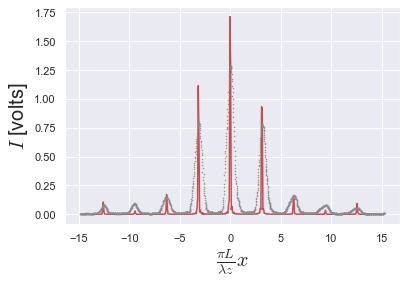

s:0.04943606248965521
a:584.0694301632342
p2:0.0006163499672360347
pL:0.380145951855058
pn:28.99928461421442
xd0:-0.0034757654871111518
R^2:0.079979713266086


In [32]:
# def newmodel(x,s,*args):
#     return es.model_integrate(x,es.n_slits_model_reduced,s,*args)

def n_slits_model_reduced(x, p2, pL, pn, x0):
    return p2 * (np.sin(pL *  (x - x0)) ** 2 * np.sin(pn *  (x - x0)) ** 2 * es.csc( (x - x0)) ** 2) / (
                ( (x - x0)) ** 2)

def newmodel(x,s,a ,*args):
    return model_integrate(x,n_slits_model_reduced,s,a,*args)

def model_integrate(xdata,model,s_, a_,*args):
    '''
    used to create a model function with integration
    :param xdata:
    :param model: model function
    :param s_: integration width
    :param a_: integration variable change correction
    :param args: additional model arguments
    :return: integrative model function
    '''
    ydata_=np.zeros(len(xdata))
    for i in range(len(xdata)):
        v = np.linspace(xdata[i] - s_ / 2, xdata[i] + s_ / 2, 100)
        for j in v:
            ydata_[i] += a_ * model(j, *args)*(s_/100)
    return ydata_

pname=['s', 'a', 'p2', 'pL', 'pn', 'xd0']
#these conditions are wrong for this data
z=0.85
d=4.0e-5
L=10.0e-5
A=50/250*1.2
wl=(6.328*(10**(-7)))
n=14 # probably 14 might me 24 but most likely not
offset=0
s=5.0e-5
# s, p2, pL, pn, x0=[((np.pi*d)/(wl*z))*s,((np.pi*d)/(wl*z))*(A*(d**2))/(wl*z),L/d,L*((2*n)+1)/d,offset]
s = (np.pi*L/(wl*z))*0.001*0.05
a = (np.pi*L/(wl*z))
pL=d/L
pn=(2*n+1)
p2=(A*(d**2))/(wl*z)
x0=offset*(np.pi*L/(wl*z))

beg,fin=[650,-500]
data=es.read('exp1125/original parameters/10 lines per millimiters','sweep2.txt')
xdata=z*np.sin(np.deg2rad(es.volt_to_angle(data['angle'][beg:fin])))-0.00485
ydata=-data['power'][beg:fin]
# xdata*=(np.pi*d)/(wl*z)
xdata=(np.pi*L/(wl*z))*xdata

plt.plot(xdata,ydata,'.',markersize=1,color=sbs.color_palette()[7])
popt, pcov=fit.curve_fit(newmodel,xdata,ydata,[s, a, p2, pL, pn, x0],bounds=((0,0,0,0,0,-np.inf),
                                                                           (np.inf,np.inf,np.inf,np.inf,np.inf,np.inf)))
plt.plot(xdata,newmodel(xdata,*popt),zorder=1,color=sbs.color_palette()[3])
# plt.plot(xdata,newmodel(xdata,*[s,a,p2,pL,pn,x0]),zorder=1,color=sbs.color_palette()[3])
# plt.plot(xdata,1.2/100*es.n_slits_model_reduced(xdata,*[p2,pL,pn,x0]),'--')
plt.xlabel(r"$\frac{\pi L}{\lambda z}x$")
plt.ylabel(r"$I$ [volts]")
plt.show()
for i in range(len(popt)): print(pname[i]+':'+str(popt[i]))
print('R^2:'+str(es.Rsquared(xdata,ydata,newmodel,popt)))
es.ring()

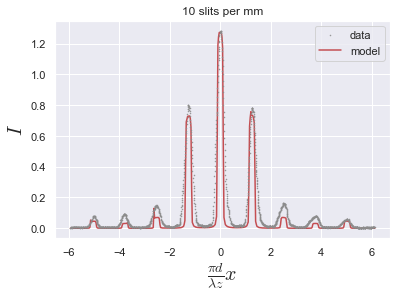

s:0.23353534921293623
p2:0.036357591722253786
pL:2.5004919676307775
pn:72.51551444869853
xd0:0.0009025634004330054
R^2:0.792558658521402


In [31]:
def newmodel(x,s,*args):
    return es.model_integrate(x,es.n_slits_model_reduced,s,*args)

bplot=['10 slits per mm',r'$\frac{\pi d}{\lambda z}x$',r'$I$',['data','model']]
pname=['s', 'p2', 'pL', 'pn', 'xd0']
#these conditions are wrong for this data
z=0.85
d=4.0e-5
L=10.0e-5
A=5/0.45*1.2/1.4*1.2
wl=(6.328*(10**(-7)))
n=14 # probably 14 might me 24 but most likely not
offset=0
s=5.0e-5
s=0.00085

Dd, p2, pL, pn, x0=[(np.pi*d)/(wl*z),(A*(d**2))/(wl*z),L/d,L*((2*n)+1)/d,offset]
s*=Dd
beg,fin=[1320,-1070]
beg,fin=[650,-500]
data=es.read('exp1125/original parameters/10 lines per millimiters','sweep2.txt')
xdata=z*np.sin(np.deg2rad(es.volt_to_angle(data['angle'][beg:fin])))-0.00485
ydata=-data['power'][beg:fin]
xdata*=Dd
plt.plot(xdata,ydata,'.',markersize=1,color=sbs.color_palette()[7])
popt, pcov=fit.curve_fit(newmodel,xdata,ydata,[s, p2, pL, pn, x0],bounds=((0,0,0,0,-np.inf),
                                                                           (np.inf,np.inf,np.inf,np.inf,np.inf)))
plt.plot(xdata,newmodel(xdata,*popt),zorder=1,color=sbs.color_palette()[3])
es.bplt(*bplot)
# plt.plot(xdata,newmodel(xdata,*[s,p2,pL,pn,x0]),zorder=1,color=sbs.color_palette()[3])
plt.show()
for i in range(len(popt)): print(pname[i]+':'+str(popt[i]))
print('R^2:'+str(es.Rsquared(xdata,ydata,newmodel,popt)))

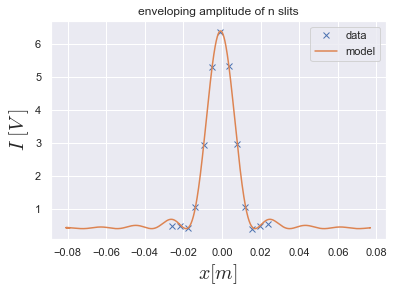

R^2:0.9675048163032152
w:175.85191359731436
A:5.975523703167846
offset:-0.0007269847319341531


In [30]:
#this one fails to do fit with the hole model
#                   *
#                  _ _
#        *         - -        *
#       - -        - -       - -
#       - -        - -       - -
#    -      --  --   --   --   --
#*--          --        --       ---**
plotb=['enveloping amplitude of n slits',r'$x[m]$',r'$I\ [V\ ]$',['data','model']]
pname=['w','A','offset']
z=0.85
d=3.49e-5
L=20.71e-5
A=10000/2*7
wl=(6.328*(10**(-7)))
n=13 #probobly 14 might me 24 but most likely not
offset=0
s=0.0005

Dd, p2, pL, pn, x0=[(np.pi*d)/(wl*z),(A*(d**2))/(wl*z),L/d,L*((2*n)+1)/d,offset]

def model_integrate(xdata,model,s,*args):
    ydata=np.zeros(len(xdata))
    for i in range(len(xdata)):
        ydata[i]=integrals.quad(model,xdata[i]-s/2,xdata[i]+s/2,args=args)[0]
        # ydata[i]=np.sum(model(np.linspace(xdata[i]-s/2,xdata[i]+s/2,1000),*args)*s/1000)
    return ydata

def newmodel(x,s,*args):
    return model_integrate(x,es.n_slits_model,s,*args)
def sinc(x,w,A,offset):
    return A*(np.sin(w*(x-offset))**2/(w*(x-offset))**2)

beg,fin=[0,-1]
data=es.read('exp1202/n slits/8 per mm','sweep 1.txt')
xdata=(z*np.sin(np.deg2rad((es.volt_to_angle(data['angle'][beg:fin])))))-0.0025 #x data adjusted for distortion
ydata=-data['power'][beg:fin]
# plt.plot(xdata,ydata,'.',markersize=1,zorder=2,color=sbs.color_palette()[7])
peaks, _=signal.find_peaks(ydata,height=0.29,distance=200)
plt.plot(xdata[peaks],ydata[peaks],'x')
# plt.plot(xdata,sinc(xdata,170,6,0)+0.3)
popt, conv=fit.curve_fit(sinc,xdata[peaks],ydata[peaks]-np.min(ydata[peaks]),[170,6,0])
plt.plot(xdata,sinc(xdata,*popt)+np.min(ydata[peaks]))
es.bplt(*plotb)
plt.show()
print('R^2:'+str(es.Rsquared(xdata[peaks],ydata[peaks],sinc,popt)))
for i in range(len(popt)): print(pname[i]+':'+str(popt[i]))

# plt.plot(xdata,newmodel(xdata,*[s,A,z,d,wl,L,n,offset]))

***

In [ ]:

data=es.read('exp1202/n slits/8 per mm','sweep 1.txt')
z=0.85
d=0.00004
L=0.000184801
A=50
wl=(6.328*(10**(-7)))
n=1#probobly 14 might me 24 but most likely not
offset=0
s=5.0e-5
#               ((A*(d**2))/(wl*z))
Dd, p2, pL, pn, x0=[(np.pi*d)/(wl*z),(A*(d**2))/(wl*z),L/d,L*((2*n)+1)/d,offset]
xdata=z*np.sin(np.deg2rad(es.volt_to_angle(data['angle'])))
plt.plot(xdata,es.n_slits_model(xdata,*[A,z,d,wl,L,n,offset+0.01]),zorder=1,color=sbs.color_palette()[3])
plt.plot(xdata,es.n_slits_model_reduced(xdata,*[Dd, p2, pL, pn, x0]))
plt.show()

In [ ]:
# .
# .
# .
# .
# .
# .
# .
# .
# .
# .
# .
# .
# .
# .
# .
# .
# .
# .
# .
# .
# .
# .
# .
# .
# .

In [ ]:
pname=['s', 'A', 'z', 'd', 'wl', 'L', 'n', 'offset']
z=0.84
d=4.0e-5
L=10.0e-5
A=4
wl=(6.328*(10**(-7)))
n=10
offset=+0.005
s=0.0005
def model_integrate(xdata,model,s,*args):
    ydata=np.zeros(len(xdata))
    for i in range(len(xdata)):
        ydata[i]=np.sum(model(np.linspace(xdata[i]-s,xdata[i]+s,1000),*args)*(s/1000))
    return ydata
def newmodel(x,s,*args):
    return model_integrate(x,es.n_slits_model,s,*args)

data=es.read('exp1125/original parameters/10 lines per millimiters','sweep2.txt')
xdata=z*np.sin(np.deg2rad((es.volt_to_angle(data['angle'])))) #x data agusted for distortion
ydata=-data['power']
plt.plot(xdata,ydata,'.',markersize=1,zorder=2,color=sbs.color_palette()[7])
popt, pcov=fit.curve_fit(newmodel,xdata,ydata,[s, A, z, d, wl, L, n, offset],
                         bounds=((0     ,0     ,z-0.001*z,d-0.01*d,wl-wl*0.001,L-L*0.01,n-n/2,-np.inf),
                                 (5    ,np.inf,z+0.001*z,d+0.01*d,wl+wl*0.001,L+L*0.01,n+n/2,np.inf)))
plt.plot(xdata,newmodel(xdata,popt[0],*popt[1:]),zorder=1,color=sbs.color_palette()[3])
# plt.plot(xdata,newmodel(xdata,s,*[A, z, d, wl, L, n, offset]),zorder=1,color=sbs.color_palette()[3])
plt.legend(['data','theory'])
plt.show()
for i in range(len(popt)): print(pname[i]+':'+str(popt[i]))
print('R^2:'+str(es.Rsquared(xdata,ydata,newmodel,popt)))

In [ ]:
def model_integrate(xdata,model,s,*args):
    ydata=np.zeros(len(xdata))
    for i in range(len(xdata)):
        ydata[i]=np.average(model(np.linspace(xdata[i]-s,xdata[i]+s,1000),*args))
    return ydata
def newmodel(x,s,*args):
    return model_integrate(x,es.n_slits_model,s,*args)
plt.plot(xdata,ydata,'.',markersize=1,zorder=2,color=sbs.color_palette()[7])

z=0.84
d=4.0e-5
L=10.0e-5
A=4
wl=(6.328*(10**(-7)))
n=14
offset=+0.005
s=0.0005
plt.plot(xdata,newmodel((np.pi*d*xdata)/(wl*z),s,*[A, z, d, wl, L, n, offset]),zorder=1,color=sbs.color_palette()[3])
plt.show()

In [ ]:
x,A,z,wl,L,offset,n,d=symbols('x,A,z,lambda,L,x0,n,d')
xd,xd0=symbols("x_d,x0_d")
xL,xL0=symbols("x_L,x0_L")
xn,xn0=symbols("x_n,x0_n")
p2=symbols('p2')
pn=symbols('p_n')
pL=symbols('p_L')
display(Latex(r"$$x_d= \frac{\pi d}{\lambda z}x$$"))
# display(Latex(r"$$x_L= \frac{\pi L}{\lambda z}x$$"))
# display(Latex(r"$$x_n= \frac{\pi L(2n+1)}{\lambda z}x$$"))
display(Latex(r"$$p_2=\frac{A d^2}{\lambda z}$$"))
display(Latex(r"$$p_n=\frac{L(2n+1)}{d}$$"))
display(Latex(r"$$p_L=\frac{L}{d}$$"))
display(Latex("$${}$$".format(latex(A * (2 * z * csc(((2 * pi / wl) * L * (x - offset)) / (2 * z)) ** 2 * sin(
        (d * (2 * pi / wl) * (x - offset)) / (2 * z)) ** 2 * sin(
        ((2 * pi / wl) * L * (1 + 2 * n) * (x - offset)) / (2 * z)) ** 2) / (
                   (2 * pi / wl) * pi * (x - offset) ** 2)))))
display(Latex("$${}$$".format(latex(p2 * (csc(pL*(xd-xd0)) ** 2 * sin(pn*(xd-xd0)) ** 2 * sin(xd-xd0) ** 2) / ((xd - xd0) ** 2)))))

In [ ]:
#this one fails to do fit with the hole model
#                   .
#                  . .
#        .         . .        .
#       . .        . .       . .
#       . .        . .       . .
#    ..      ..  ..   ..   ..   ..
#....          ..        ..       .....
pname=['s', 'A', 'z', 'd', 'wl', 'L', 'n', 'offset']
z=0.85
d=3.49e-5
L=9.71e-5
A=1000/0.3*1.2
wl=(6.328*(10**(-7)))
n=13 #probobly 14 might me 24 but most likely not
offset=0
s=0.0005

Dd, p2, pL, pn, x0=[(np.pi*d)/(wl*z),(A*(d**2))/(wl*z),L/d,L*((2*n)+1)/d,offset]

def model_integrate(xdata,model,s,*args):
    ydata=np.zeros(len(xdata))
    for i in range(len(xdata)):
        ydata[i]=integrals.quad(model,xdata[i]-s/2,xdata[i]+s/2,args=args)[0]
        # ydata[i]=np.sum(model(np.linspace(xdata[i]-s/2,xdata[i]+s/2,1000),*args)*s/1000)
    return ydata

def newmodel(x,s,*args):
    return model_integrate(x,es.n_slits_model,s,*args)

beg,fin=[1100,-900]
data=es.read('exp1125/original parameters/10 lines per millimiters','sweep2.txt')
xdata=(z*np.sin(np.deg2rad((es.volt_to_angle(data['angle'][beg:fin])))))-0.005 #x data adjusted for distortion
ydata=-data['power'][beg:fin]
plt.plot(xdata,ydata,'.',markersize=1,zorder=2,color=sbs.color_palette()[7])
plt.plot(xdata,newmodel(xdata,*[s, A, z, d, wl, L, n, offset]))
# popt, pcov=fit.curve_fit(newmodel,xdata,ydata,[s, A, z, d, wl, L, n, offset],#n==>p2=2100
#                          bounds=((    0,     0,     0,     0,     0,     0,     0,-0.001),
#                                 (np.inf,np.inf,np.inf,np.inf,np.inf,np.inf,np.inf,0.001)))
# plt.plot(xdata,newmodel(xdata,*popt),zorder=1,color=sbs.color_palette()[3])
# plt.plot(xdata,es.n_slits_model(xdata,*[A, z, d, wl, L, n, offset]),zorder=1,color=sbs.color_palette()[3])
plt.legend(['data','theory'])
plt.show()
# for i in range(len(popt)): print(pname[i]+':'+str(popt[i]))
# print('R^2:'+str(es.Rsquared(xdata,ydata,newmodel,popt)))
# es.ring()

In [ ]:
def model_integrate(xdata,model,s,*args):
    q=1000
    ydata=np.zeros(len(xdata))
    for i in range(len(xdata)):
        ydata[i]=np.sum(model(np.linspace(xdata[i]-s,xdata[i]+s,q),*args)*(2*s/q))
    return ydata
def newmodel(x,s,*args):
    return model_integrate(x,es.n_slits_model_reduced,s,*args)# xd, p2, pL, pn, xd0


z=0.85
d=4.49e-5
L=6.74e-5
A=50
wl=(6.328*(10**(-7)))
n=24 # probobly 14 might me 24 but most likely not
offset=0
s=5.0e-5


p2, pL, pn, xd0=[A*d**2/(wl*z),L/d,L*((2*n)+1)/d,np.pi*d*offset/(wl*z)]
xdata=np.linspace(-10,10,20000)
plt.plot(xdata,newmodel(xdata,*[s, p2, pL, pn, xd0]),zorder=1,color=sbs.color_palette()[3])
plt.show()

In [ ]:
z=0.85

import os
wlk=os.walk('exp1202/n slits')
for folder in es.list_folders('exp1202/n slits'):
    for file in es.list_files(str(os.path.join('exp1202/n slits',str(folder)))):
        path=os.path.join('exp1202/n slits',folder)
        data=es.read(path,file)
        xdata=z*np.sin(np.deg2rad(es.volt_to_angle(data['angle'])))
        ydata=-data['power']
        plt.figure()
        plt.plot(xdata,ydata,'.',markersize=1,color=sbs.color_palette()[7])
        plt.title(str(os.path.join(folder,file)))
plt.show()